In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [6]:
def plot(x, xlabel, y, ylabel, color):
    plt.scatter(x, y, c=color, cmap='cividis', alpha=0.3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.colorbar();
    plt.show()

In [7]:
data = np.genfromtxt('Tetuan_City_power_consumption.csv', delimiter=',')

In [8]:
data = np.delete(data, 0, 0)

In [9]:
data = np.delete(data, 0, 1)

In [10]:
rows = data.shape[0]
time = np.arange(rows)
time = time.reshape(-1, 1)
data = np.append(data, time, axis=1)

In [11]:
training_rows = np.int64(rows* 0.8)
training_data = np.array(data[:training_rows])

In [12]:
test_data = np.array(data[training_rows:])

In [13]:
time = np.array(training_data[:,8])
time_test = np.array(test_data[:,8])

In [14]:
temperature = np.array(training_data[:,0])
temperature = np.array([np.round(num, 2) for num in temperature])
temperature_test = np.array(test_data[:,0])
temperature_test = np.array([np.round(num, 2) for num in temperature_test])


In [15]:
humidity = np.array(training_data[:,1])
humidity_test = np.array(test_data[:,1])

In [16]:
diffuse_flow = np.array(training_data[:,4])
diffuse_flow_test = np.array(test_data[:,4])

In [17]:
wind_speed = np.array(training_data[:,2])
wind_speed_test = np.array(test_data[:,2])

In [18]:
power_consumption = np.array(training_data[:,5])
power_consumption_test = np.array(test_data[:,5])

In [19]:
x = temperature.reshape((-1, 1)) # add first dimension of x, and reshape to column format
x = np.insert(x, 0, humidity, 1) # add a second dimension to x
x = np.insert(x, 0, diffuse_flow, 1) # add a third dimension to x
x = np.insert(x, 0, time, 1) # add a fourth dimension to x
x = np.insert(x, 0, wind_speed, 1) # add a fifth dimension to x
y = power_consumption

In [20]:
x_test = temperature_test.reshape((-1, 1)) # add first dimension of x, and reshape to column format
x_test = np.insert(x_test, 0, humidity_test, 1) # add a second dimension to x
x_test = np.insert(x_test, 0, diffuse_flow_test, 1) # add a third dimension to x
x_test = np.insert(x_test, 0, time_test, 1) # add a fourth dimension to x
x_test = np.insert(x_test, 0, wind_speed_test, 1) # add a fifth dimension to x
y_test = power_consumption_test

In [21]:
model = LinearRegression().fit(x, y)

In [22]:
r_squared_train = np.round(model.score(x, y), 4)
r_squared_test = np.round(model.score(x_test, y_test), 4)
print(f"coefficient of determination (training data): {r_squared_train}") # only 0.1989!!! not great!
print(f"coefficient of determination (test data): {r_squared_test}")


coefficient of determination (training data): 0.1989
coefficient of determination (test data): 0.0806


In [23]:
# print the equation
b1 = np.round(model.coef_[0], 2)
b2 = np.round(model.coef_[1], 2)
b3 = np.round(model.coef_[2], 2)
b4 = np.round(model.coef_[3], 2)
b5 = np.round(model.coef_[4], 2)
print(f"equation: power_consumption = {b1}*temperature + {b2}*humidity + {b3}*diffuse_flow + {b4}*time + {b5}*wind_speed")



equation: power_consumption = -188.79*temperature + -0.1*humidity + -3.45*diffuse_flow + -29.95*time + 660.4*wind_speed


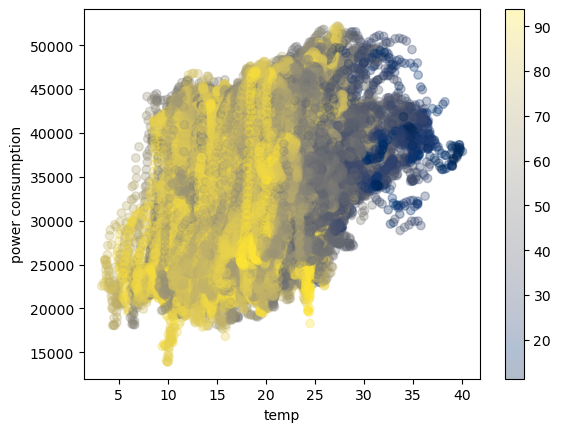

In [24]:
plot(temperature, "temp", power_consumption, "power consumption", humidity)

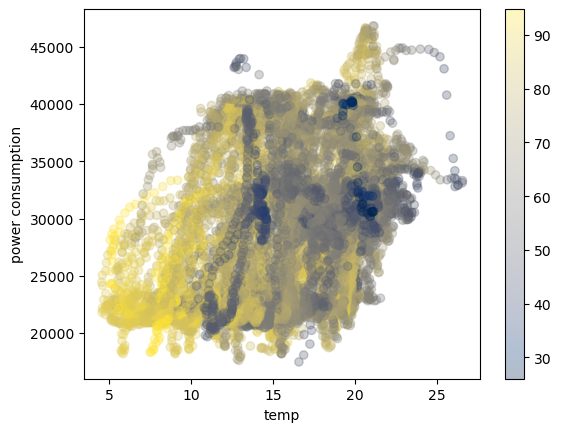

In [27]:
plot(temperature_test, "temp", power_consumption_test, "power consumption", humidity_test)